# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [59]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [60]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

#print train_data[:5]


training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [61]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(5):
        print 'Example: ', i+1
        print 'Label: ', newsgroups_train.target_names[train_labels[i]]
        print 'Data: ', train_data[i]
        print '--------------'
### STUDENT END ###
P1()

Example:  1
Label:  comp.graphics
Data:  Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--------------
Example:  2
Label:  talk.religion.misc
Data:  

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstra

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

ANSWER:

In [62]:
def P2():
### STUDENT START ###

    def report(vectorizer, corpus):
        # Create Bag Of Words
        bow = vectorizer.fit_transform(corpus)
        # Length of vocabulary
        vocab_len = len(vectorizer.get_feature_names())
        # Total number of non-zeros over number of rows = average nnz per row
        avg_nnz = float(bow.nnz)/float(bow.toarray().shape[0])
        # Fraction of nnz in matrix
        frac_nnz = float(bow.nnz)/float((bow.toarray().shape[0]*bow.toarray().shape[1]))    
        print("Vocabulary Length: {0.3d}".format(vocab_len))
        print("Average non-zeros per feature: {0:4.4f} ".format(avg_nnz))
        print("Fraction of non-zero features: {0:4.4f} ".format(frac_nnz))
        return bow

 
    vectorizer = CountVectorizer(min_df=1)
#    corpus = np.concatenate((newsgroups_test.data,newsgroups_train.data), axis=0)
    corpus = newsgroups_train.data
    # Create Bag Of Words
    bow = vectorizer.fit_transform(corpus)
    
    # Question A
    vocab_len = len(vectorizer.get_feature_names())
    # Total number of non-zeros over number of rows = average nnz per row
    avg_nnz = float(bow.nnz)/float(bow.toarray().shape[0])
    # Fraction of nnz in matrix
    frac_nnz = float(bow.nnz)/float((bow.toarray().shape[0]*bow.toarray().shape[1]))    
 
    print('A ----------------')
    print("Vocabulary Length: {0:3d}".format(vocab_len))
    print("Average non-zeros per feature: {0:4.4f} ".format(avg_nnz))
    print("Fraction of non-zero features: {0:4.4f} ".format(frac_nnz))
    print
    
    # Question B  
    first = vectorizer.get_feature_names()[0]
    last = vectorizer.get_feature_names()[-1]
    print('B ----------------') 
    print('First word: {0:s}  Last Word: {1:s}'.format(first,last))
    print 
    # Question C
    vocab = ["atheism", "graphics", "space", "religion"]
    vectorizer = CountVectorizer(min_df=1,vocabulary=vocab)
    bow = vectorizer.fit_transform(corpus)
    vocab_len_2 = len(vectorizer.get_feature_names())
    # Total number of non-zeros over number of rows = average nnz per row
    avg_nnz_2 = float(bow.nnz)/float(bow.toarray().shape[0])
    # Fraction of nn in matrix
    frac_nnz_2 = float(bow.nnz)/float((bow.toarray().shape[0]*bow.toarray().shape[1]))
    print('C ----------------')
    print("Vocabulary: {0:s}".format(vocab))
    print("New shape: {0:s}".format(bow.toarray().shape))
    print("Vocabulary Length: {0:3d}".format(vocab_len_2))
    print("Average non-zeros per feature: {0:4.4f} ".format(avg_nnz_2))
    print("Fraction of non-zero features: {0:4.4f} ".format(frac_nnz_2))
    print
    
    # Question D
 #   corpus = newsgroups_train.data
    #bigram/trigram analyzer
    print 'D --------------'
    vectorizer = CountVectorizer(ngram_range=(2,2),token_pattern=r'\b\w+\b', min_df=1)
    bow = vectorizer.fit_transform(corpus)
    print("Bigram vocabulary size: {0:d}".format(len(vectorizer.get_feature_names())))
    vectorizer = CountVectorizer(ngram_range=(3,3),token_pattern=r'\b\w+\b', min_df=1)
    vectorizer.fit_transform(corpus)
    print("Trigram vocabulary size: {0:d}".format(len(vectorizer.get_feature_names())))
    vectorizer = CountVectorizer(ngram_range=(1,3),token_pattern=r'\b\w+\b', min_df=1)
    vectorizer.fit_transform(corpus)
    print("Unigram to Trigram vocabulary size: {0:d}".format(len(vectorizer.get_feature_names())))
    print


    # Question E
    print 'E --------------'
 #   corpus = newsgroups_train.data
    # set min_df = 10 to count features occurances in 11 or more documents
    vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', min_df=int(10))
    vectorizer.fit_transform(corpus)
    print("Vocabulary size for min_df = 10: {0:d}".format(len(vectorizer.get_feature_names())))
    print

    print 'F --------------'
    vectorizer= CountVectorizer(token_pattern=r'\b\w+\b', min_df=1)
    # Calculate training features
    matrix_train = vectorizer.fit_transform(newsgroups_train.data)
    train_len = len(vectorizer.get_feature_names())
    
    # Calculate test features
    matrix_test = vectorizer.fit_transform(newsgroups_test.data)
    test_len = len(vectorizer.get_feature_names())
    
    # Report percentages of total
    print("test fraction: {0:2.2f}% ".format(100.0*float(test_len)/float(test_len + train_len)))
    print("train fraction: {0:2.2f}% ".format(100.0*float(train_len)/float(test_len + train_len)))
    
    

 
    
### STUDENT END ###
P2()

A ----------------
Vocabulary Length: 26879
Average non-zeros per feature: 96.7060 
Fraction of non-zero features: 0.0036 

B ----------------
First word: 00  Last Word: zyxel

C ----------------
Vocabulary: ['atheism', 'graphics', 'space', 'religion']
New shape: (2034, 4)
Vocabulary Length:   4
Average non-zeros per feature: 0.2684 
Fraction of non-zero features: 0.0671 

D --------------
Bigram vocabulary size: 196586
Trigram vocabulary size: 329269
Unigram to Trigram vocabulary size: 552768

E --------------
Vocabulary size for min_df = 10: 3101

F --------------
test fraction: 44.50% 
train fraction: 55.50% 


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

-----knn-----
KNN f1 score: 0.3885


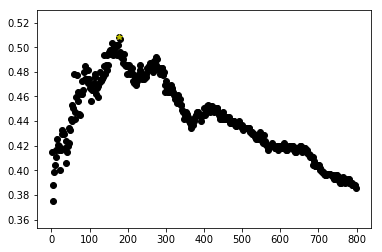

Optimal K: 177  Max score: 0.5081
-----mnb-----
f1 score (default): 0.7666
Best alpha {'alpha': 0.02}
f1 score using best alpha: 0.7799
-----lrm-----
LRM f1 (default): 0.7386
Optimal C: 0.410000  Max score: 0.7533


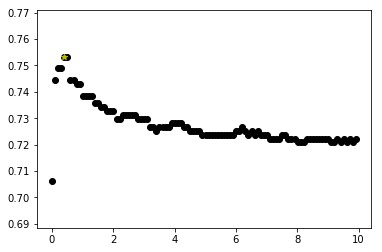

C: 0.0100 f1: 0.7061 weights: [ 2.54147847  2.93970937  2.86246884  2.25002921]
C: 1.0100 f1: 0.7386 weights: [ 168.12825592  131.69882284  158.9846895   146.70714342]
C: 2.0100 f1: 0.7326 weights: [ 258.33844365  198.39785029  240.535453    227.22164271]
C: 3.0100 f1: 0.7297 weights: [ 324.53895422  247.8564877   300.52410383  287.59709074]
C: 4.0100 f1: 0.7282 weights: [ 378.12651264  288.57108041  349.11683143  336.51827043]
C: 5.0100 f1: 0.7238 weights: [ 423.56270743  323.2831506   390.0731088   378.37151367]
C: 6.0100 f1: 0.7253 weights: [ 463.38450365  353.32467419  426.70870275  414.75371126]
C: 7.0100 f1: 0.7238 weights: [ 498.60163424  380.67645552  458.73628982  448.15143878]
C: 8.0100 f1: 0.7208 weights: [ 530.19721903  404.97207994  488.23023932  477.91906625]
C: 9.0100 f1: 0.7223 weights: [ 559.46634487  427.24197841  513.63131853  505.30564794]

Training Data Bag or Words


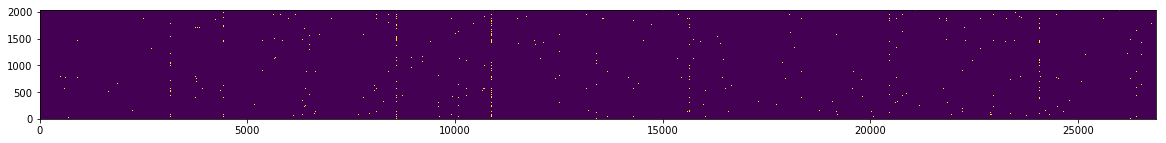

In [63]:
def P3():
### STUDENT START ###
    vectorizer = CountVectorizer()
    # create & fit training matrix
    matrix_train = vectorizer.fit_transform(train_data)
    # create test vector
    matrix_test = vectorizer.transform(test_data)
    # create knn classifier
    knn = KNeighborsClassifier()
    # fit the model to the training data
    knn.fit(matrix_train,train_labels)
    # Execute trained model against test data to yield predictions
    predictions = knn.predict(matrix_test)
    print("-----knn-----")
    # measure f1 for knn.  Use micro average
    knn_f1 = metrics.f1_score(test_labels, predictions, average='micro')
    print("KNN f1 score: {0:1.4f}".format(knn_f1))
    
    # find optimal k
    
    plts = list()
    max_score = -1
    max_k= -1
    k_ceil = 800  # a reasonable guess at the ceiling without running through everything
    
    for k in range(1,k_ceil,2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(matrix_train,train_labels)
        score = knn.score(matrix_test,test_labels)
        plts.append(score)
        if score > max_score:
            max_score = score
            max_k = k
    plt.scatter(range(1,k_ceil,2),plts,  color='black')
    plt.plot([max_k],[max_score],color = 'y',marker='*')
#    plt.savefig("John_Tabbone_hw2_q3_knn.png")
    plt.show()
    print( "Optimal K: {0:3d}  Max score: {1:1.4f}".format(max_k,max_score))   


    
    # create multinomial Bayes classifier.  
    mnb = MultinomialNB()
    mnb.fit(matrix_train,train_labels)
    predictions = mnb.predict(matrix_test)
    print("-----mnb-----")
    mnb_f1 = metrics.f1_score(test_labels, predictions,average='micro')
    print("f1 score (default): {0:1.4f}".format(mnb_f1))

    # Determine best alpha for multinomial NB using GridSearchCV
    alphas = {'alpha':[float(x)/100 for x in range(0,100,1)]}
    params = {'alpha': alphas}
   
    # create the gridsearch CV to rank alpha values during fitting
    gscv = GridSearchCV(mnb,alphas)
    # fit against training data
    gscv.fit(matrix_train,train_labels)
    
    # report best alpha
    print 'Best alpha', gscv.best_params_
    actual, predicted = test_labels, gscv.predict(matrix_test)
    
    mnb2 = MultinomialNB(alpha=gscv.best_params_['alpha'])
    mnb2.fit(matrix_train,train_labels)
    predictions = mnb2.predict(matrix_test)
    mnb2_f1 = metrics.f1_score(test_labels, predictions,average='micro')
    print("f1 score using best alpha: {0:1.4f}".format(mnb2_f1))

    #   Logistic regression model
    print("-----lrm-----")
    vectorizer = CountVectorizer()
    matrix_train = vectorizer.fit_transform(train_data)
    matrix_test = vectorizer.transform(test_data)
    lrm = LogisticRegression()
    lrm.fit(matrix_train, train_labels)
    predicted = lrm.predict(matrix_test)
  
    # extract coefficients
    weights = lrm.coef_
    lrm_f1 = metrics.f1_score(test_labels,predicted,average='micro')    
    print("LRM f1 (default): {0:1.4f}".format(lrm_f1))
 

    plts = list()
    weights = list();
    best_c= -1
    best_f1 = -1;
    Cs = [float(x)/100 for x in range(1,1000,10)]
    for c in Cs:
        lrm = LogisticRegression(C=c, penalty='l2')
        lrm.fit(matrix_train, train_labels)
        predicted = lrm.predict(matrix_test)
        lrm_f1 = metrics.f1_score(test_labels,predicted,average='micro') 
        plts.append(lrm_f1)
        weights.append( (lrm.coef_**2).sum(1))
        if lrm_f1 > best_f1:
            best_f1 = lrm_f1
            best_c = c
            
    print( "Optimal C: {0:3f}  Max score: {1:1.4f}".format(best_c,best_f1))              
    plt.scatter(Cs,plts,  color='black')
    plt.plot([best_c],[best_f1],color = 'y',marker='*')
#    plt.savefig("John_Tabbone_hw2_q3_lrm.png")
    plt.show()
    
    for i in range(0,len(weights),10):
        print("C: {0:3.4f} f1: {1:1.4f} weights: {2}".format(Cs[i],plts[i],str(weights[i])))
 
    count_v = CountVectorizer(binary=True)
    tdm = count_v.fit_transform(train_data)

    print('')
    print('Training Data Bag or Words')
    plt.figure(figsize = (20,2))
    plt.figure(1)
    plt.imshow(tdm.todense(), aspect='auto',origin='lower')
    plt.show()
 
      
### STUDENT END ###
P3()

a. Why doesn't nearest neighbors work well for this problem?

The Matrix is extremely sparse, far sparser than the representation above.  Nearest neighbors for most points are simply not near anything discriminating.  Many points may be nearest to the strongly dashed vertical lines above, which are least representitive of a class because they occur in many different documents.

But also, I question whether employing knn starts from a weaker position because the types of data on the axes have less information.  I think the idea of distance is compromised by the fact that the x axis is an alphabetical listing of the lexicon (ordinal) and the y axis indicates whether a word is in a document (nominal).  I think you need at least an interval scale in order for euclidean distance to make sense.

A point at (0,0) in a flattened bag of words indicates whether the first word in the lexicon apears in the first document.  A point at (3,4) means that the third word in the lexicon appears in the fourth document.  Are the two occurances 5 units different?  Are occurances that are 4 units apart more similar? Are occurances at 10 units apart twice as different? Seems to me that the idea of sameness by proximity is weakened because the meaning of distance has less information.

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

I think Naieve Bayes works best because it treats features independantly and unlike Logistic Regression is not affected by the relationships between features.  

c. Logistic regression estimates a weight vector for each class, which you can access with the coef_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

As C increases so too does the sum of coefficients.  C represents the inverse of the penalty on the coefficients, so larger values of C will yield smaller penalties (1/C) and have smaller impact.

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [6]:
def P4():
### STUDENT START ###
    
    vectorizer = CountVectorizer()
    matrix_train = vectorizer.fit_transform(train_data)
    matrix_dev = vectorizer.transform(dev_data)
    lrm = LogisticRegression()
    lrm.fit(matrix_train, train_labels)
    predictions = lrm.predict(matrix_dev)
    

    indices = list()
    #for each newsgroup
    for i in range(len(newsgroups_train.target_names)):
        #get list of coeficients
        coef_list = np.argsort(lrm.coef_[i])
        indices.append(coef_list[-5:])
    # flatten the list of arrays    
    indices = [val for sublist in indices for val in sublist]
    
 
   
    print("{0: >10} {1:>10}  \t{2:>10}\t{3:>10}\t{4:>10}".format("FEATURE" ,
                                                               newsgroups_train.target_names[0],
                                                               newsgroups_train.target_names[1],
                                                               newsgroups_train.target_names[2],
                                                               newsgroups_train.target_names[3],
                                                              ))
    feature_names = vectorizer.get_feature_names();
    for i in indices:
        print("{0: >10} \t{1:>10}\t{2:>10}\t{3:>10}\t{4:>10}".format(feature_names[i], 
                                                    (lrm.coef_[0])[i],
                                                    (lrm.coef_[1])[i],
                                                    (lrm.coef_[2])[i],
                                                    (lrm.coef_[3])[i] ))
                                          
    print
    print("---bigrams---")

    vectorizer = CountVectorizer(ngram_range=(2,2))
    matrix_train = vectorizer.fit_transform(train_data)
    matrix_dev = vectorizer.transform(dev_data)
    lrm = LogisticRegression()
    lrm.fit(matrix_train, train_labels)
    predictions = lrm.predict(matrix_dev)
    

    indices = list()
    #for each newsgroup
    for i in range(len(newsgroups_train.target_names)):
        #get list of coeficients
        coef_list = np.argsort(lrm.coef_[i])
        indices.append(coef_list[-5:])
    # flatten the list of arrays    
    indices = [val for sublist in indices for val in sublist]
    
 
   
    print("{0: >10} {1:>10}  \t{2:>10}\t{3:>10}\t{4:>10}".format("FEATURE" ,
                                                               newsgroups_train.target_names[0],
                                                               newsgroups_train.target_names[1],
                                                               newsgroups_train.target_names[2],
                                                               newsgroups_train.target_names[3],
                                                              ))
    feature_names = vectorizer.get_feature_names();
    for i in indices:
        print("{0: >10} \t{1:>10}\t{2:>10}\t{3:>10}\t{4:>10}".format(feature_names[i], 
                                                    (lrm.coef_[0])[i],
                                                    (lrm.coef_[1])[i],
                                                    (lrm.coef_[2])[i],
                                                    (lrm.coef_[3])[i] ))
     
    
 
   
   
   
### STUDENT END ###
P4()

   FEATURE alt.atheism  	comp.graphics	 sci.space	talk.religion.misc
   atheism 	0.939212479789	-0.410344875723	-0.449328576508	-0.434544914828
  religion 	0.954141673213	-0.616939633663	-0.792408237334	-0.0643095411463
     bobby 	0.990263748522	-0.220798394475	-0.340716439639	-0.463362139365
  atheists 	1.0290704751	-0.0973486598993	-0.3205506342	-0.835083955132
  deletion 	1.12496773066	-0.398207180067	-0.42038144796	-0.395625190574
  computer 	0.143345242181	0.978128923912	-0.681910711091	-0.486985379095
        3d 	-0.359191975909	1.1249611078	-0.702097190072	-0.37863042924
      file 	-0.334762505853	1.26668061896	-0.806438849425	-0.62658178485
     image 	-0.582242016245	1.34678976991	-0.825897033015	-0.469007482639
  graphics 	-0.758767087586	1.93697797193	-1.33597471369	-0.762724959174
spacecraft 	-0.355356427364	-0.393437907287	0.91991107463	-0.380665460289
    launch 	-0.469613673112	-0.465366285751	0.936319652243	-0.332615900304
      nasa 	-0.572060945772	-0.479469320781	1

ANSWER:  Kent has way too much time and has become a heavy hitter on the boards.  Also the term 'religion' is far more commonly seen in alt.athesism than talk.religion.misc.  One might conversly think that 'athesism' appears more frequently in talk.religion.misc, but that would be wrong.  That term too apears more frequently in alt.athesism

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [7]:
import string


def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###

    def abolish(s, targets):
        for target in targets:
            if re.search(target, s, re.IGNORECASE):
                s = s.replace(target,'')
        return s
    
    preps =['aboard','about','above','across','after','against','along','amid','among','anti','around','as','at','before''behind',
            'below','beneath','beside','besides','between','beyond','but','by',
            'concerning','considering','despite','down','during','except','excepting','excluding','following','for','from','in',
            'inside','into','like','minus','near','of','off','on','onto','opposite',
            'outside','over','past','per','plus','regarding','around','save','since','than','through','to','towa','toward','under','underne','unlike','until','up',
            'upon','versus','via','with','within','without']
    articles = ['a','an','the','this','that']
    
    noun_suffix = ['al','ance','ence','dom','er','or','ism','ist','ity','ty','ment',
                   'ness','ship','sion','tion']
    
    verb_suffix = ['ate','en','ify', 'fy','ize', 'ise']
    
    adj_suffix = ['able','ible','al','esque','ful','ic', 'ical','ious', 'ous','ish','ive','less','y']

    little_verbs = ['is','am','are','have','has','was','were']
    
    punctuation = ['!', '"', '#', '$', '%', '&', "'",
                 # '*', '+', ',', '-', '.', '/', ':', ';', '<',
                #  '=', '>', '?', '@', '[', '\\', ']', '^', '_',
                  '`', '{', '|', '}', '~']

    
    # strip punctuation, no time to hunt for the magic character that is not compiling
    s = abolish(s,punctuation)
    # remove prepositions
    s = abolish(s,preps)
    # abolish articles
    s = abolish(s,articles)
    # remove noun_suffix
    s = abolish(s,noun_suffix)
    #remove verb suffix
    s = abolish(s,verb_suffix)
    #remove adj suffix
    s = abolish(s,adj_suffix)
    #remove little verbs
    s = abolish(s,little_verbs)
    
           
    return(s)    
    ### STUDENT END ###

def P5():
### STUDENT START ###
    vocab_size = -1
    f1_score = -1
    for name,func in zip(["Empty Preprocessor","Enhanced Preprocessor"],[empty_preprocessor, better_preprocessor]):
        vectorizer = CountVectorizer(preprocessor=func)
        matrix_train = vectorizer.fit_transform(train_data)
        matrix_test = vectorizer.transform(test_data)
        lrm = LogisticRegression()
        lrm.fit(matrix_train, train_labels)
        predicted = lrm.predict(matrix_test)
        f1 = metrics.f1_score(test_labels,predicted,average='micro')
        print("---------- "+name+" ------------")
        print "Vocabulary size: {0:}".format(matrix_train.shape[1])
        print "F1-score: {0:1.4f}".format(f1)
        if vocab_size == -1:
            vocab_size = matrix_train.shape[1]
            f1_score = f1
        else:
            vocab_size = vocab_size - matrix_train.shape[1]
            f1_score = abs(f1_score - f1)
            print("Vocabulary size difference: {0:} F1 score difference {1:}".format(vocab_size,f1_score))
            
    
    

### STUDENT END ###
P5()

#better_preprocessor('this is to via a testish!')

---------- Empty Preprocessor ------------
Vocabulary size: 33291
F1-score: 0.7120
---------- Enhanced Preprocessor ------------
Vocabulary size: 27859
F1-score: 0.7282
Vocabulary size difference: 5432 F1 score difference 0.0162481536189


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

    C         l1           l2     Accuracy    
0.0010          2            8   0.3737    
0.0100         18           72   0.5126    
0.1000        209          836   0.6883    
1.0000       1104         4416   0.7386    
10.0000       2580        10320   0.7400    
100.0000       7495        29980   0.7356    


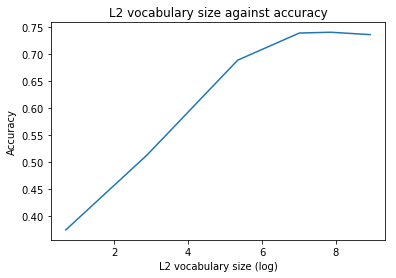

In [32]:
    np.random.seed(0)
    # set up some helpful variables
    
    # relax convergence criteria
    tol=.01
    
    # store the count of our l1 non-zero coeficients
    l1_nz_coefs_count = []
    # store the count of l2 non-zero coeficients
    l2_nz_coefs_count = []
    #store l2 vocab size for plot (same as l1 coef count)
    l2_vocab_size = []
    # store accuracy readings for l2
    l2_accuracy = []
    
    # The list of C values to iterate through
    Cs = [0.001,0.01,0.1,1,10,100]
#    Cs = [0.001,0.01,0.1]
    for c in Cs:
        # Set up l1 CountVectorizer
        vectorizer = CountVectorizer()
        matrix_train = vectorizer.fit_transform(train_data)
        matrix_test = vectorizer.transform(test_data)
        lrm_l1 = LogisticRegression(penalty='l1',C=c, tol=tol)
        lrm_l1.fit(matrix_train, train_labels)

        nz_indices = []
        #Get the list of non zero l1 features.  This bit of sorcery came from you
        # I couldn't get the ravel to work
        for index, coef_sum in enumerate( (lrm_l1.coef_ != 0.0).sum(0)):
#        for index, coef_sum in enumerate(lrm_l1.coef_.ravel()):
            if coef_sum > 0:
                nz_indices.append(index)   
        
        # update the l1 non zero coef count for report
        l1_nz_coefs_count.append(len(nz_indices))  
        # loop through non-zero indices to assemble vocab list from the feature_names
        nz_vocab = [vectorizer.get_feature_names()[i] for i in nz_indices]   
        
        
        # create l2 regression using vocabulary from l1
        vectorizer = CountVectorizer(vocabulary = nz_vocab)
        matrix_train = vectorizer.fit_transform(train_data)
        matrix_test = vectorizer.transform(test_data)       
        lrm_l2 = LogisticRegression(penalty='l2',C=c, tol=tol)
        fit_l2 = lrm_l2.fit(matrix_train, train_labels)
        
        #add up the non-zero coeficients
        l2_nz_coefs_count.append(sum([1 for sub_list in fit_l2.coef_ for x in sub_list if x != 0.0 ])) 
        
        # update the vocab size for the graph
        l2_vocab_size.append( len(nz_vocab))     
        
        #run a prediction to develop an accuracy score for the l2 model
        predicted = lrm_l2.predict(matrix_test)
        l2_accuracy.append(float(np.sum(predicted == test_labels))/len(test_labels))
    
    
     # print report.  I'm going to learn pandas
    print("{0:>5} {1:>10}   {2:>10}   {3:>10}    ".format('C','l1','l2','Accuracy'))   
    for c, nz_l1,nz_l2, accuracy in zip(Cs,l1_nz_coefs_count,l2_nz_coefs_count,l2_accuracy):
        print("{0:2.4f} {1:>10}   {2:>10}   {3:2.4f}    ".format(c,nz_l1,nz_l2, accuracy))
        
    # create plot
    plt.plot(np.log(l2_vocab_size), l2_accuracy)
    plt.title('log L2 vocab size vs. accuracy')  
    plt.show() 
       

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [58]:
def P7():
### STUDENT START ###
  
    #Create Tfid vectorizer and logistic regression model
    vectorizer = TfidfVectorizer()
    matrix_train = vectorizer.fit_transform(train_data)
    matrix_dev = vectorizer.transform(dev_data)       
    lrm = LogisticRegression(C=100)
    lrm.fit(matrix_train, train_labels)
    lrm_predict_prob = lrm.predict_proba(matrix_dev)
    predictions = lrm.predict(matrix_dev)
    
    r_vals = []
    for i, prob in enumerate(lrm_predict_prob):
        r_vals.append(float(np.max(lrm_predict_prob))/prob[dev_labels[i]])
                    
            
    for i in np.argsort(r_vals)[-3:]:
        print("-------- R score: {0:1.4f} --------".format(r_vals[i]))
        actual = newsgroups_train.target_names[dev_labels[i]]
        pred_name = newsgroups_train.target_names[predicted[i]]
        print("Actual: {0:}  Predicted: {1:}".format(actual,pred_name))
        print
        print( dev_data[i])
        print
    
    
  

## STUDENT END ###
P7()

-------- R score: 331.7150 --------
Actual: talk.religion.misc  Predicted: comp.graphics

Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.

-------- R score: 412.9245 --------
Actual: alt.atheism  Predicted: talk.religion.misc


The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...


-------- R score: 935.2094 --------
Actual: talk.religion.misc  Predicted: comp.graphics

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,

ANSWER:
Q:How is TF-IDF  different from the CountVectorizer? 

TF-IDF is used to measure the importance of words apearing in a corpus.  The idea is that if a word apears multiple times in a single document, it is important (it has high Term Frequency).  However if that word apears many times in multiple documents, it is probably not a word specific to the central idea of a single document; for example articles apear very frequently in many docments.  The TF is multiplied by the inverse of the document frequency (IDF) to negate the weight of frequenty occuring words that don't express the idea of a single document.

This is very different from CountVectorizer which simply creates a histogram like structure of word counts across a corpus without applying weights to the words that show uniqueness to individual documents.

Q: What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

The model apears to be identifying computer terms and classifying them with comp.graphics.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

The music stopped and I needed a seat!  No time for the bonus!  But thanks Daniel, this was enjoyable and well needed considering the other things going on.  Cheers.